# Project Title

**Authors:** Carlos McCrum, Micheal Lee, Doug Mill
***

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## Business Problem

Vehicle Safety Board wants to know if they should spend more funding in drivers education or fixing roads.

***
Questions to consider:
* What are the business's pain points related to this project?
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?
***

## Data Understanding

Describe the data being used for this project.
***
Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?
***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import plot_confusion_matrix, roc_auc_score, plot_roc_curve
from sklearn.preprocessing import MultiLabelBinarizer, OneHotEncoder, StandardScaler, label_binarize
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import accuracy_score

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from imblearn.over_sampling import SMOTE

## Data Loading

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

In [55]:
main_df = pd.read_csv('data/cleaned_data/cleaned_modeling_data.csv')
# Remove Bad Weather as it was too highly correlated with Bad Road Conditions
columns_to_drop = ['Unnamed: 0', 'BAD_WEATHER']
main_df.drop((columns_to_drop), axis = 1, inplace = True)

In [4]:
main_df['Target'].value_counts(normalize = True)

0    0.754374
1    0.245626
Name: Target, dtype: float64

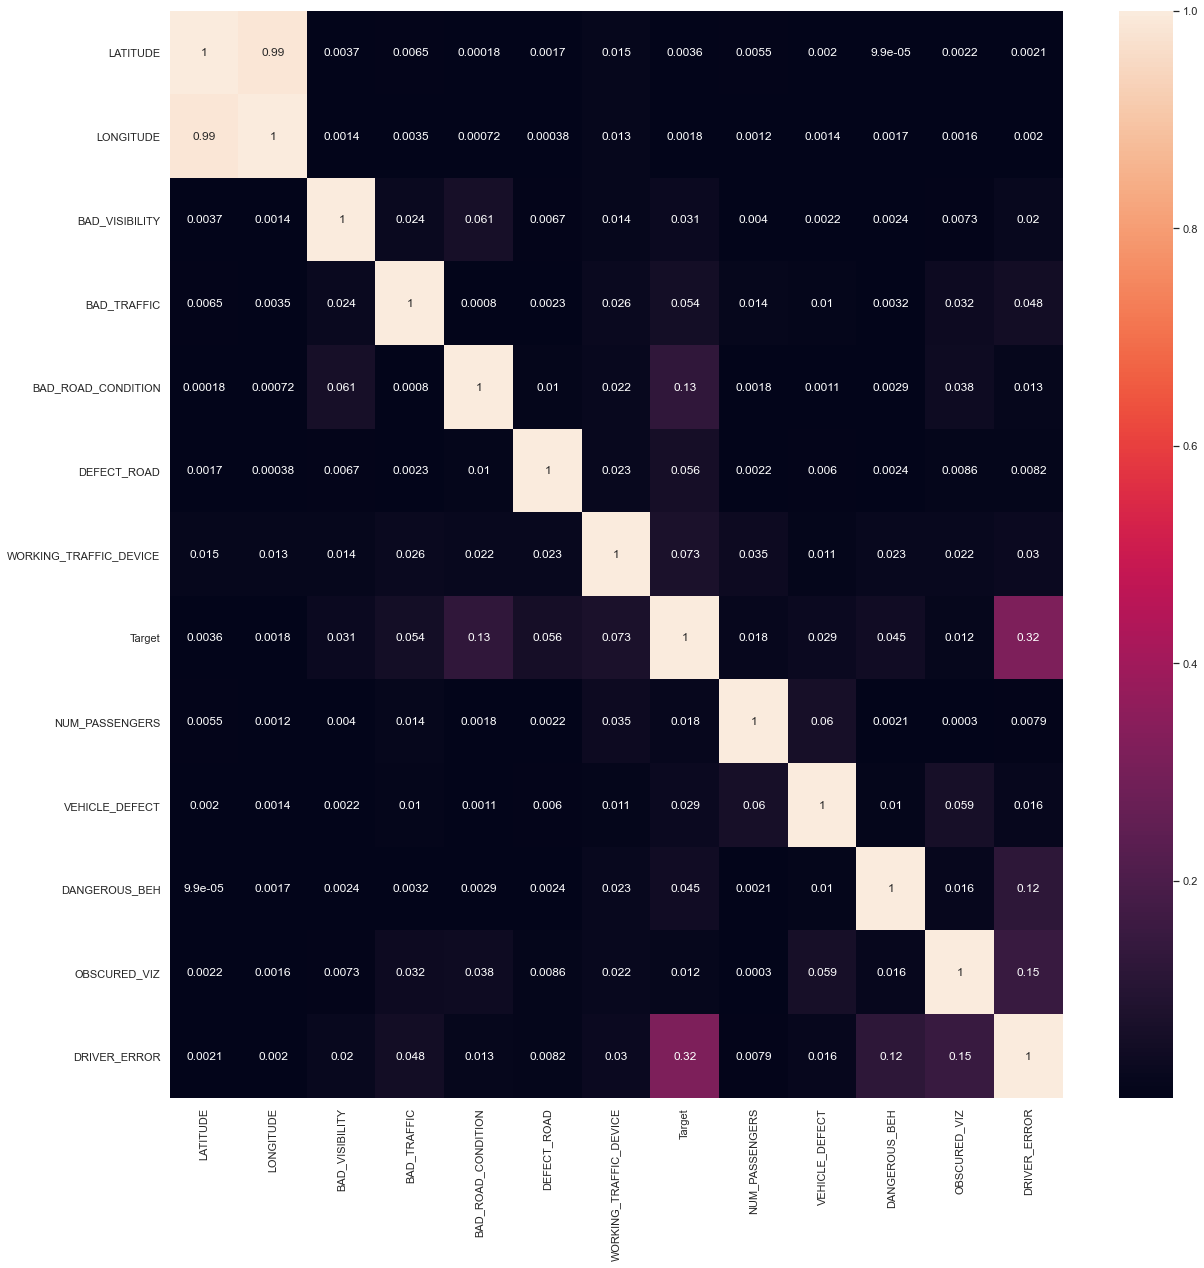

In [56]:
sns.set(rc={'figure.figsize':(20, 20)})
sns.heatmap(main_df.corr().abs(),annot=True);

## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

## Simple Model - Logistic Regression

In [58]:
columns_to_drop = ['CRASH_RECORD_ID','CRASH_DATE', 'LONGITUDE', 'LATITUDE', 'Target']

In [59]:
X = main_df.drop((columns_to_drop), axis=1)
y = main_df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

[0.7545599 0.7545599 0.7545529 0.7545529 0.7545529]


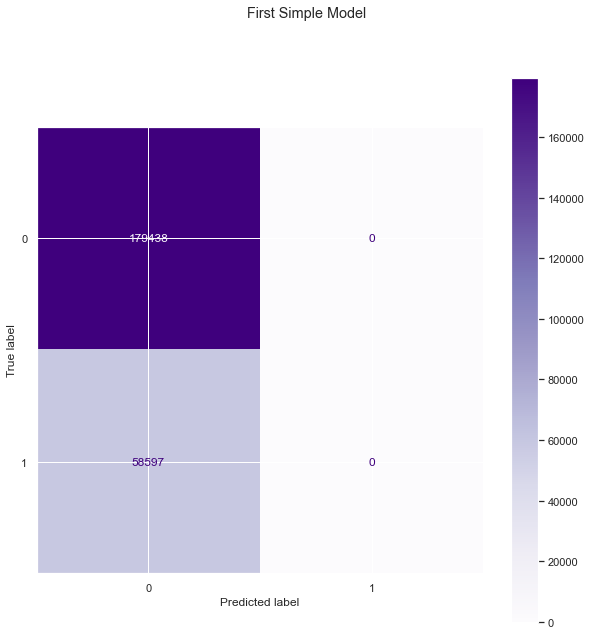

In [90]:
fsm_dummy = DummyClassifier(strategy='most_frequent')
fsm_dummy.fit(X_train, y_train)

fsm_cv = cross_val_score(fsm_dummy, X_train, y_train, cv=5)
print(fsm_cv)

fig, ax = plt.subplots(figsize = (10, 10))
fig.suptitle('First Simple Model')
plot_confusion_matrix(fsm_dummy, X_test, y_test, ax=ax, cmap='Purples');

Because our class balance is 3:1, we are not going to SMOTE the minority class.

decison tree for baseline model with low amount of leaves

depth max leaves


## Using RFE to select the most important columns

In [ ]:
num_features_to_select = 5
use_RSE = True
from sklearn.feature_selection import RFE
select = RFE(dt, n_features_to_select=num_features_to_select)
select.fit(X = X_train, y = y_train)

keep_list = [(k,v) for k,v in zip(main_df.drop((columns_to_drop), axis=1).columns,select.support_)]
keep_string = ''
for k,v in keep_list:
    if v:
        keep_string += k + '+'
if use_RSE == False:
    keep_list = formula_string.split('+')
keep_string = keep_string[:-1]

keep_string

In [80]:
X = main_df[['BAD_ROAD_CONDITION','DEFECT_ROAD','WORKING_TRAFFIC_DEVICE','OBSCURED_VIZ','DRIVER_ERROR']]
y = main_df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

dt_rfe = DecisionTreeClassifier(random_state = 42)
dt_rfe.fit(X_train, y_train)
dt_rfe.score(X_test, y_test)

0.7555023420925494

In [82]:
X = main_df.drop((columns_to_drop), axis = 1)
y = main_df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

dt = DecisionTreeClassifier(random_state = 42)
dt.fit(X_train, y_train)
dt.score(X_test, y_test)

0.7563467557291995

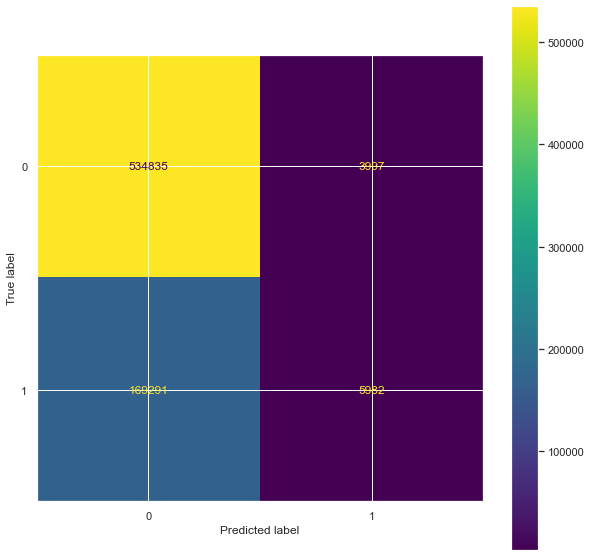

In [84]:
sns.set(rc={'figure.figsize':(10, 10)})
plot_confusion_matrix(dt, X_train, y_train);

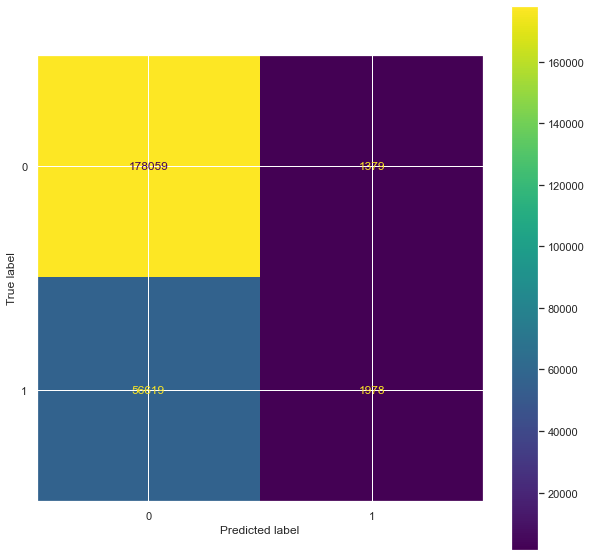

In [85]:
plot_confusion_matrix(dt, X_test, y_test);

In [95]:
bayes = CategoricalNB()
ohe = OneHotEncoder()
logreg = LinearSVC()
rf = RandomForestClassifier()
ovr = OneVsRestClassifier(logreg)

In [ ]:
dt = DecisionTreeClassifier(random_state = 1, max_depth=100)
X = main_df.drop((columns_to_drop), axis=1)
y = main_df.Target

X = ohe.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

In [96]:
ovr.fit(X_train, y_train)
dt.fit(X_train, y_train)
print('One vs Rest Score: {}'.format(ovr.score(X_train, y_train)))
print('Decision Tree Score: {}'.format(dt.score(X_train, y_train))) 

One vs Rest Score: 0.7524971817869921
Decision Tree Score: 0.757335405857682


In [ ]:
plot_confusion_matrix(dt, X_test, y_test);

In [ ]:
# train_pred = ovr.predict(X_train)
# train_pred = label_binarize(train_pred, classes=len(main_df.Target1))
# y_test = label_binarize(y_test, classes=len(main_df.Target1))


In [ ]:
# roc_auc_score(y_train, train_pred, multi_class='ovo', average='macro')

In [ ]:
X2 = main_df.drop(['Target1', 'CRASH_RECORD_ID', 'MAKE', 'MODEL', 'CRASH_DATE', 'AGE'], axis=1)
y2 = main_df.Target1

X2 = ohe.fit_transform(X2)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, random_state = 1)


In [ ]:
ovr.fit(X_train2, y_train2)
dt.fit(X_train2, y_train2)
print('One vs Rest Score: {}'.format(ovr.score(X_train2, y_train2)))
print('Decision Tree Score: {}'.format(dt.score(X_train2, y_train2))) 

# Grid Search

Because Decision Trees gave us the best accuracy score, we decided to try and find the best parameters
Using Grid Search to find the best parameters

In [139]:
grid = [{'max_depth': [4, 6, 8], 
         'min_samples_split': [5, 10, 15], 
         'min_samples_leaf': [20, 25, 30]}]
GS = GridSearchCV(estimator=dt, 
                          param_grid=grid, 
                          scoring='recall', 
                          cv=5)

In [140]:
GS.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid=[{'max_depth': [4, 6, 8],
                          'min_samples_leaf': [20, 25, 30],
                          'min_samples_split': [5, 10, 15]}],
             scoring='recall')

In [141]:
GS.cv_results_

{'mean_fit_time': array([0.2447485 , 0.24604931, 0.26230397, 0.25861583, 0.24504924,
        0.26130981, 0.29262919, 0.32643795, 0.27138014, 0.34458575,
        0.34264293, 0.34032536, 0.3376245 , 0.33871341, 0.34239502,
        0.36982017, 0.35815492, 0.3525671 , 0.40582809, 0.3998384 ,
        0.38398399, 0.40741863, 0.42419848, 0.41262202, 0.41620736,
        0.41063604, 0.40554047]),
 'std_fit_time': array([0.00214896, 0.00663728, 0.02088562, 0.01942095, 0.0040863 ,
        0.01419883, 0.03309763, 0.01705002, 0.0085237 , 0.00867417,
        0.00853743, 0.00638358, 0.00443393, 0.00306203, 0.00472789,
        0.02413453, 0.02094852, 0.01987518, 0.00692623, 0.02138009,
        0.0191504 , 0.03735162, 0.02433384, 0.0238465 , 0.01979958,
        0.01947908, 0.01564996]),
 'mean_score_time': array([0.03949442, 0.04009309, 0.0412899 , 0.03969393, 0.03979497,
        0.04168835, 0.06382971, 0.04908423, 0.04258776, 0.04757447,
        0.04328775, 0.0420907 , 0.04279504, 0.04298682, 0.043084

In [142]:
GS.best_estimator_.score(X_test, y_test)

0.7563425546663306

In [143]:
0.7563467557291995

0.7563467557291995

In [144]:
GS.best_params_

{'max_depth': 8, 'min_samples_leaf': 25, 'min_samples_split': 5}

## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***